In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df_rewards = pd.read_csv('./out/cumulated_reward.csv', index_col=[0, 1])
df_rewards

reward     reward.1     reward.2     reward.3  \
               createdAt                                                        
MABTree Random 2024-10-02    45.207222    44.395278    48.491111    46.529960   
               2024-10-03    78.744246    77.492431    87.451389    80.665516   
               2024-10-04   115.969127   112.930758   120.076383   119.232391   
               2024-10-05   143.400000   136.671495   150.529143   149.795323   
               2024-10-06   172.153333   166.438858   177.101983   190.732545   
...                                ...          ...          ...          ...   
LinUCB         2024-12-18  3393.359197  3393.359197  3393.359197  3393.359197   
               2024-12-19  3438.827609  3438.827609  3438.827609  3438.827609   
               2024-12-20  3478.117054  3478.117054  3478.117054  3478.117054   
               2024-12-21  3511.423602  3511.423602  3511.423602  3511.423602   
               2024-12-22  3552.908403  3552.908403  3552.908403  3552.908403   

                              reward.4     reward.5     reward.6     reward.7  \
               createdAt                                                        
MABTree Random 2024-10-02    49.971111    45.700714    45.469989    50.296655   
               2024-10-03    79.191451    89.264751    88.001814    83.548878   
               2024-10-04   118.878117   112.984195   126.753481   116.263322   
               2024-10-05   138.714221   152.191558   153.768759   145.833044   
               2024-10-06   167.507078   184.717108   182.145505   175.389711   
...                                ...          ...          ...          ...   
LinUCB         2024-12-18  3393.359197  3393.359197  3393.359197  3393.359197   
               2024-12-19  3438.827609  3438.827609  3438.827609  3438.827609   
               2024-12-20  3478.117054  3478.117054  3478.117054  3478.117054   
               2024-12-21  3511.423602  3511.423602  3511.423602  3511.423602   
               2024-12-22  3552.908403  3552.908403  3552.908403  3552.908403   

                              reward.8     reward.9  
               createdAt                             
MABTree Random 2024-10-02    42.373333    50.940207  
               2024-10-03    71.247500    85.506874  
               2024-10-04   100.526875   124.220137  
               2024-10-05   131.872770   157.521526  
               2024-10-06   159.544873   187.422399  
...                                ...          ...  
LinUCB         2024-12-18  3393.359197  3393.359197  
               2024-12-19  3438.827609  3438.827609  
               2024-12-20  3478.117054  3478.117054  
               2024-12-21  3511.423602  3511.423602  
               2024-12-22  3552.908403  3552.908403  

[574 rows x 10 columns]

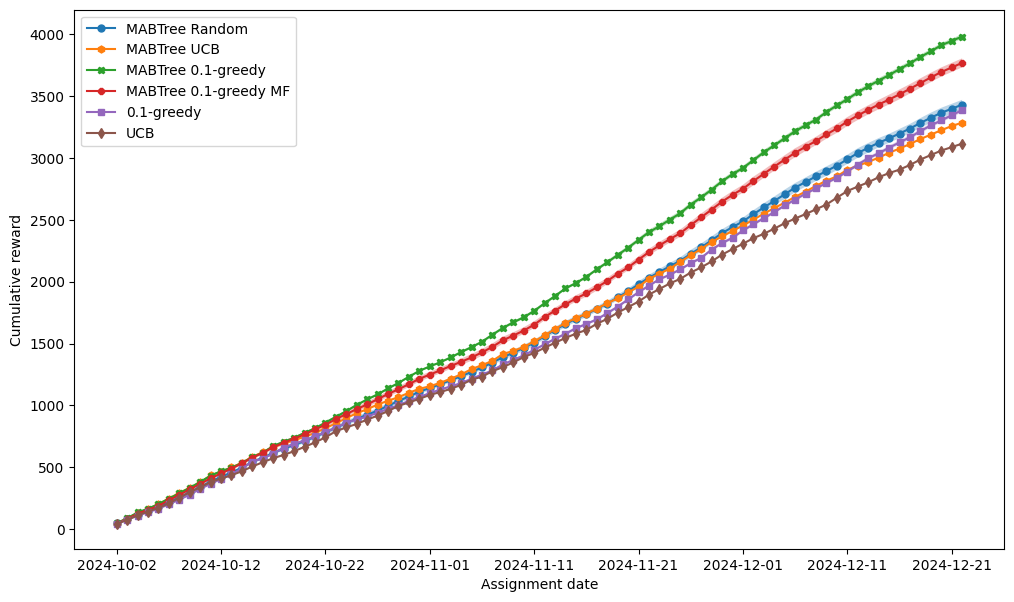

In [2]:
plt.figure(figsize=(12, 7))
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(10))
for marker, (name, group) in zip(['o', 'h', 'X', '8', 's', 'd'], df_rewards.groupby(level=0, sort=False)):
    m = group.mean(axis=1)
    s = group.std(axis=1)

    CI_min = m - 1.96 * s / group.shape[1] ** 0.5
    CI_max = m + 1.96 * s / group.shape[1] ** 0.5

    plt.plot(group.index.get_level_values(1), m, label=name, marker=marker, markersize=5)
    plt.fill_between(group.index.get_level_values(1), CI_min, CI_max, alpha=0.3)

plt.ylabel('Cumulative reward')
plt.xlabel('Assignment date')
plt.legend()
plt.savefig('./out/cumulative_reward.pdf', format='pdf', bbox_inches='tight')
plt.show()

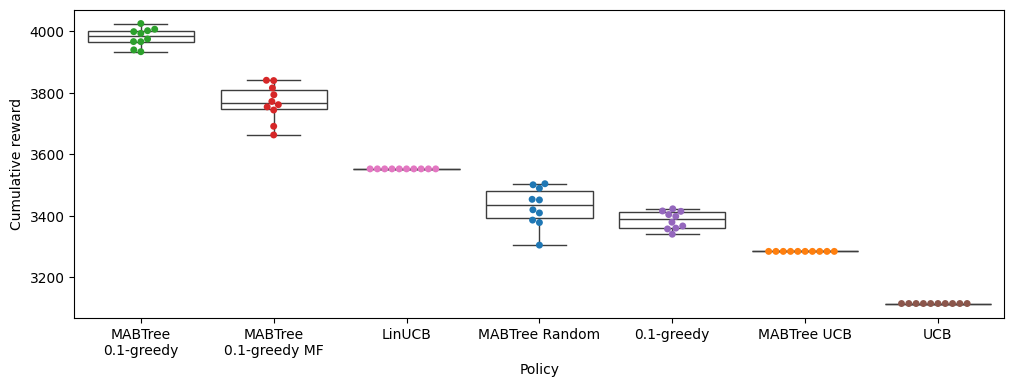

In [3]:
import seaborn as sns
final_cumulative_reward = df_rewards.groupby(level=0, sort=False).last().T
renamed = final_cumulative_reward.rename(columns={
    'MABTree 0.1-greedy': 'MABTree\n0.1-greedy',
    'MABTree 0.1-greedy MF': 'MABTree\n0.1-greedy MF'
})
rank = renamed.median().sort_values(ascending=False).index

plt.figure(figsize=(12, 4))
sns.boxplot(data=renamed, color='white', order=rank)
sns.swarmplot(data=renamed)
plt.ylabel('Cumulative reward')
plt.xlabel('Policy')
plt.savefig('./out/cumulative_reward_2.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [4]:
def highlight_max(s):
    d = s.sort_values(ascending=False)

    style = {
        d.index[0]: 'textbf:--rwrap ;',   # max
        d.index[1]: 'underline:--rwrap ;',  # second max
        d.index[-1]: 'textit:--rwrap ;',  # min
    }

    return [style.get(v, '') for v in s.index]

final_cumulative_reward = final_cumulative_reward.reset_index(drop=True)

final_cumulative_reward \
    .describe().loc[['mean', 'std', 'min', 'max', '50%']].T \
    .style.format('{:.3f}', escape=True).apply(highlight_max, axis=0) \
    .to_latex('./out/cumulative_reward_stats.tex', position='t', position_float='centering', hrules=True, caption='Cumulative reward statistics. The best and second best values of each column are highlighted in bold and underlined, respectively. The worst value is italicized.', label='tab:cumulative_reward_stats')

In [9]:
from scipy import stats


tukey_hsd = pd.DataFrame(
    columns=renamed.columns,
    index=renamed.columns,
    data=stats.tukey_hsd(*[renamed[col] for col in renamed.columns]).pvalue
)

tukey_hsd.map(lambda x: '< 0.01' if x < 0.01 else '< 0.05' if x < 0.05 else 'non stat-sig') \
    .style.to_latex('./out/tukey_hsd.tex', position='t', position_float='centering', hrules=True, caption='Tukey HSD test results. The p-values are reported.', label='tab:tukey_hsd')

In [ ]:


plt.figure(figsize=(6, 6))
sns.heatmap(pairwise_wilcoxon, annot=True, cmap='coolwarm', cbar=False, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('./out/cumulative_reward_pairwise_wilcoxon.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Coverage

In [ ]:
df_coverage = pd.read_csv('./out/coverage.csv', index_col=[0])
df_coverage

In [ ]:
final_cumulative_reward

In [ ]:
ax = plt.figure(figsize=(10, 6)).gca()
for x, y in zip(df_coverage, final_cumulative_reward):
    sns.scatterplot(x=df_coverage[x], y=final_cumulative_reward[y], ax=ax)
sns.scatterplot(x=df_coverage.mean(axis=0), y=final_cumulative_reward.mean(axis=0), hue=df_coverage.columns, s=200, marker='X', ax=ax)

plt.xlabel('Coverage')
plt.ylabel('Cumulative reward')
plt.legend()
plt.savefig('./out/cumulative_reward_vs_coverage.pdf', format='pdf')
plt.show()